### Student Information
Name: 郭沅昕

Student ID: 108011570

GitHub ID: Jerrykuo2019

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

---

<font size=7>First: take home exercises 

    2.Data Preparation

In [3]:
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

    3.Data Transformation

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

<font size=5>=====Exercise 2 (take home)

In [5]:
X.query('category_name == ["sci.med"]')[::10][0:5] 
# use func query to fecth records belonging to the sci.med category, and query every 10th record. Only show the first 5 records

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

---

    4.Data Mining using Pandas

---

<font size=5>======Exercise 5 (take home)

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


    1. NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike the isnull function will return True, so id:A,E are True
    2. id:B is really missimg so function return Ture
    3. Python recognizes (  False, 0, None, '', [], (), {}  ) as False, so id:F is False
    4. 'NaN' and 'NaN' are str so id:C,D are False

    According to these rules the ruslt make sense

---

    5.Data Preprocessing

In [7]:
X_sample = X.sample(n=1000) #random state
len(X_sample)
X_sample[0:4]

text  category  \
2114  From: ab961@Freenet.carleton.ca (Robert Alliso...         2   
808   From: jen187@its.CSIRO.AU (Graham Jenkins +61 ...         0   
1144   cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...         0   
976   From: mmatusev@radford.vak12ed.edu (Melissa N....         2   

     category_name  
2114       sci.med  
808    alt.atheism  
1144   alt.atheism  
976        sci.med

---

<font size=5>======Exercise 6 (take home)


    1. X_sample change the size from 2257 to n=1000
    2. Everytime you use the sample it will choose n sample randomly
    3. X_sample can almost represent X in small size, that mean you can analysis the smaller data, thereby achieving an whole data understanding

---

<font size=5>======Exercise 8 (take home)

Text(0.5, 1.0, 'Category distribution')

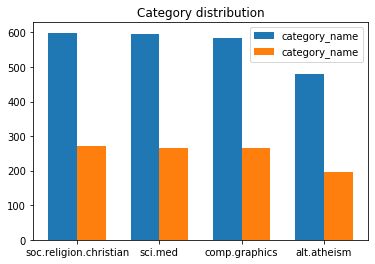

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(X.category_name.value_counts().index, X.category_name.value_counts(), 
        label = 'category_name', align = "edge", width = -0.35) #minus 0.35 from the edge
plt.bar(X.category_name.value_counts().index, X_sample.category_name.value_counts(), 
        label = 'category_name', align = "edge", width = 0.35)

plt.legend() #for using label
plt.title("Category distribution")

---

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

---

<font size=5>======Exercise 10 (take home)

In [10]:
# use for loop to find the 2nd 1 location
for i in range(99):
    if X_counts[4, 0:100].toarray()[0][i+1]==1:
        print("This 1 represent:",count_vect.get_feature_names()[i+1],"term")

This 1 represent: 01 term


---

<font size=5>======Exercise 11 (take home)

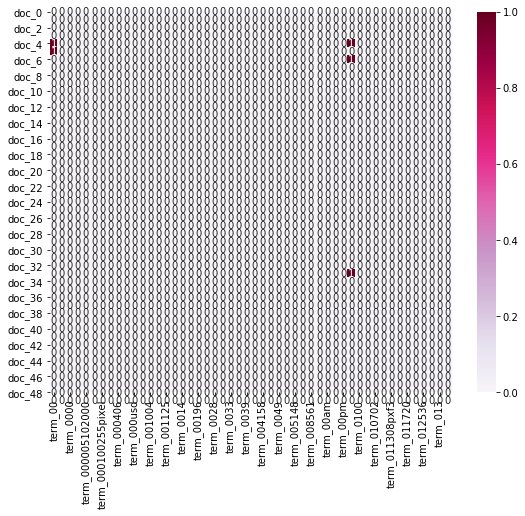

In [11]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:50].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

    I can't find useful visualization for this sprase matric, finding useful visualization i thick i'll do the dimension reduction first.

---

<font size=5>======Exercise 12 (take home)

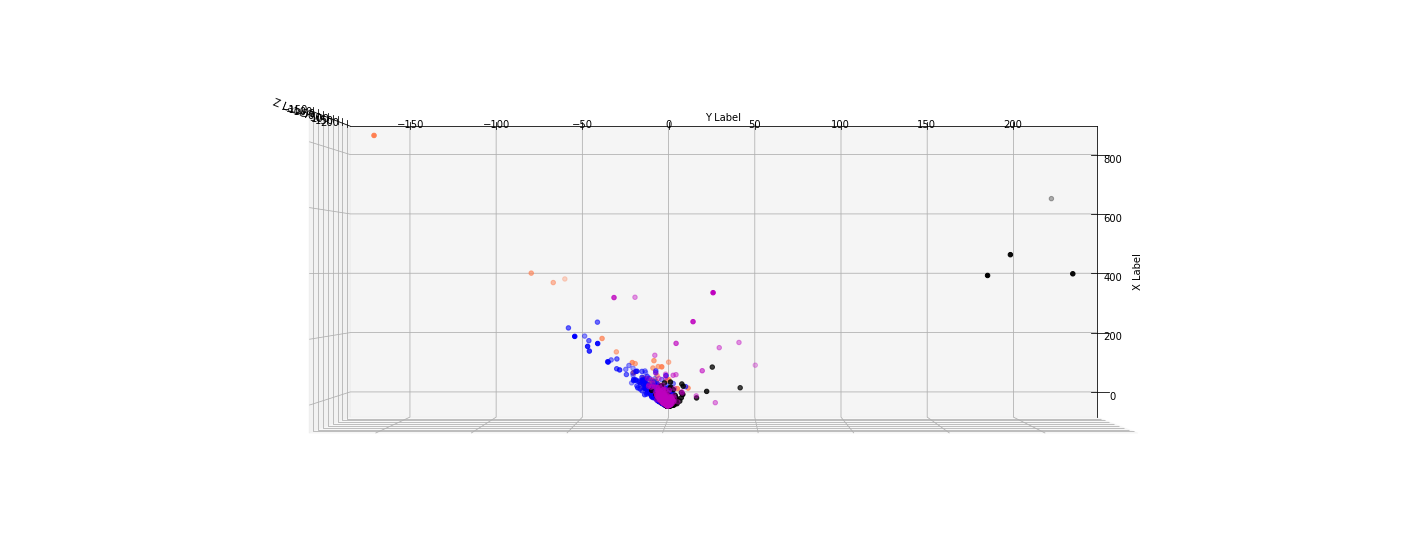

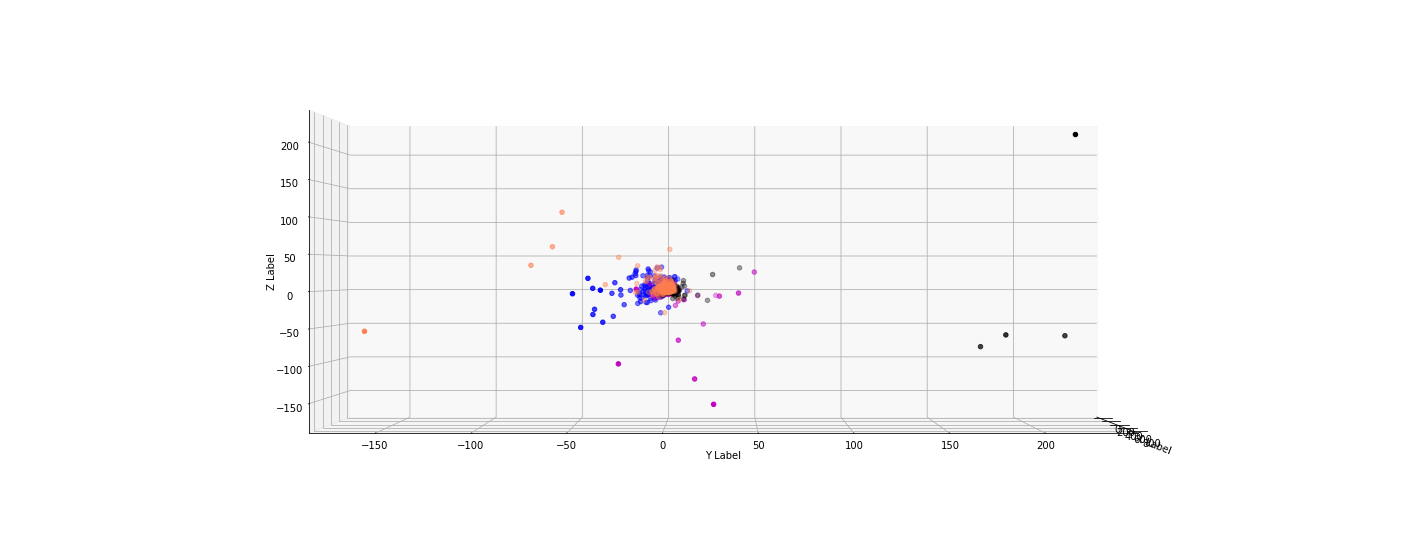

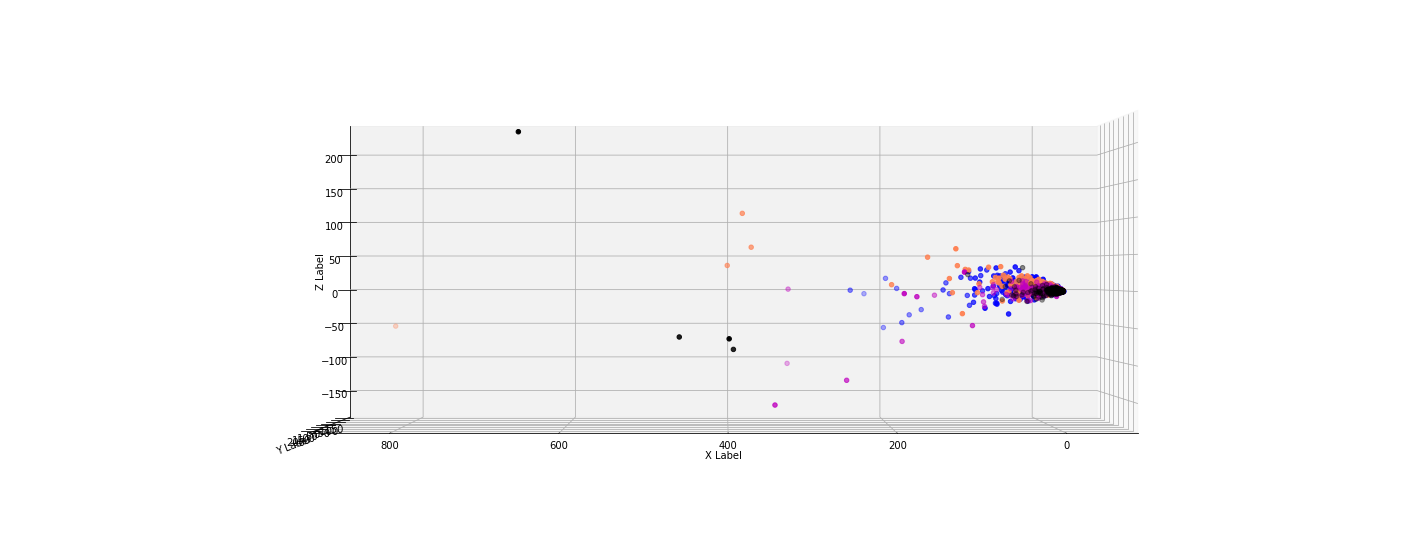

In [12]:

def plot3D(x,y):    #def function for plt 3 times in one cell
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.decomposition import PCA
    X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())  #reduce the dimension to 3

    col = ['coral', 'blue', 'black', 'm']

    # plot
    fig = plt.figure(figsize = (25,10))
    #ax = fig.subplots()

    ax = fig.add_subplot(111, projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        #ax.scatter(xs, ys, zs, s= 40, c = c, marker='o')
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev=x, azim=y)

    plt.show()
    
plot3D(-90,0)
plot3D(0,0)
plot3D(0,90)

    When the dimension is 3, it is still not possible to separate the four categories, i think it is because this kind of method to generate the word vector, the vector is too sparse, or maybe in some higher n dimension PCA will work.

---

<font size=5>======Exercise 13 (take home)

In [13]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# using plotly and see how it perform the Bar figure
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100]))

fig.show()

---

<font size=5>======Exercise 14 (take home)

---

<font size=5>======Exercise 15 (take home)

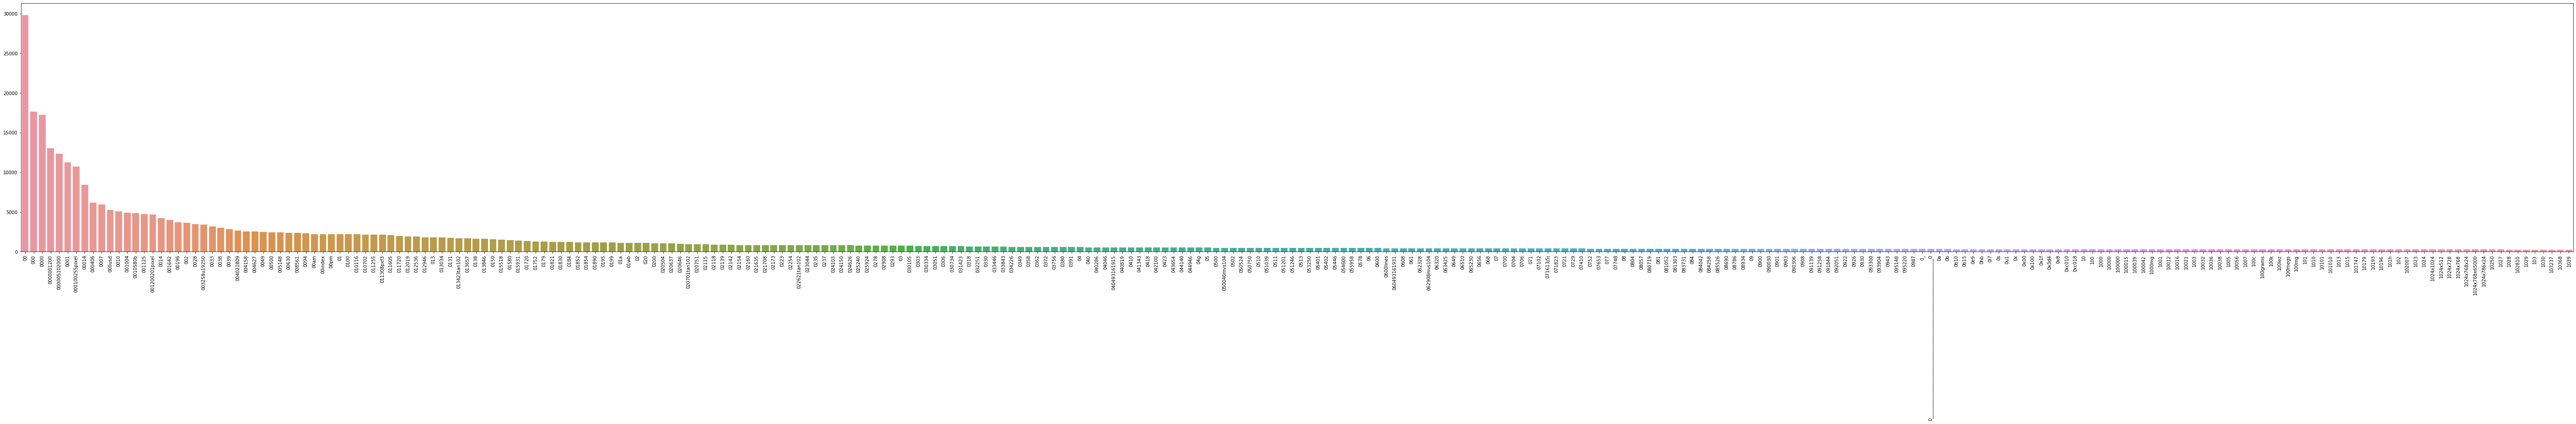

In [14]:
import seaborn as sns
ntf=sorted(term_frequencies, reverse=True) #sort the term_frequencies from high value to low
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], y=ntf[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

<font size=5>======Exercise 16 (take home)

In [15]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

    Yes, it works.

---

---

<font size=6>Second: follow the same process from the DM19-Lab1-Master Repo on the new dataset.

    2.Data Preparation

In [16]:
import pandas as pd
data1 = pd.read_table('amazon_cells_labelled.txt', names=['sentences','score'])
data2 = pd.read_table('imdb_labelled.txt', names=['sentences','score'], quoting=3) #quoting=3 read "" as the str
data3 = pd.read_table('yelp_labelled.txt', names=['sentences','score'])

data= pd.concat([data1,data2,data3], ignore_index=True)

In [17]:
print("\n".join(data.sentences[0].split("\n")))

So there is no way for me to plug it in here in the US unless I go by a converter.


In [18]:
# score of first 10 documents.
data.score[:10]

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: score, dtype: int64

---

Exercise 1 (5 min): In this exercise, please print out the text data for the first three samples in the dataset.

In [19]:
for t in data.sentences[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


---

    3.Data Transformation

In [20]:
# make a list for data's new column which is 'connotation'
list1=[]
for i in range(len(data)):
    if data.score[i]==0:
        list1=list1+["negative"]
    else:
        list1=list1+["positive"]
data['connotation'] = list1        

In [21]:
data[0:10]

sentences  score connotation
0  So there is no way for me to plug it in here i...      0    negative
1                        Good case, Excellent value.      1    positive
2                             Great for the jawbone.      1    positive
3  Tied to charger for conversations lasting more...      0    negative
4                                  The mic is great.      1    positive
5  I have to jiggle the plug to get it to line up...      0    negative
6  If you have several dozen or several hundred c...      0    negative
7        If you are Razr owner...you must have this!      1    positive
8                Needless to say, I wasted my money.      0    negative
9                   What a waste of money and time!.      0    negative

In [22]:
# a simple query
data[0:10][["sentences", "connotation"]]

sentences connotation
0  So there is no way for me to plug it in here i...    negative
1                        Good case, Excellent value.    positive
2                             Great for the jawbone.    positive
3  Tied to charger for conversations lasting more...    negative
4                                  The mic is great.    positive
5  I have to jiggle the plug to get it to line up...    negative
6  If you have several dozen or several hundred c...    negative
7        If you are Razr owner...you must have this!    positive
8                Needless to say, I wasted my money.    negative
9                   What a waste of money and time!.    negative

In [23]:
# using loc (by position)
data.iloc[::10, 0:2][0:10]

sentences  score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [24]:
# using loc (by label)
data.loc[::10, 'sentences'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentences, dtype: object

---

======Exercise 2 (take home)

In [25]:
data.query('connotation == ["negative"]')[::10][0:5] 
# use func query to fecth records belonging to the connotation category, and query every 10th record. Only show the first 5 records

sentences  score connotation
0   So there is no way for me to plug it in here i...      0    negative
20  I went on Motorola's website and followed all ...      0    negative
37                        Poor Talk Time Performance.      0    negative
60  Essentially you can forget Microsoft's tech su...      0    negative
83                     The battery runs down quickly.      0    negative

---

Exercise 3 (5 min)

In [26]:
data[data['connotation']=='negative'].iloc[::10][0:5]

sentences  score connotation
0   So there is no way for me to plug it in here i...      0    negative
20  I went on Motorola's website and followed all ...      0    negative
37                        Poor Talk Time Performance.      0    negative
60  Essentially you can forget Microsoft's tech su...      0    negative
83                     The battery runs down quickly.      0    negative

---

    4.Data Mining using Pandas

In [27]:
data.isnull()

sentences  score  connotation
0         False  False        False
1         False  False        False
2         False  False        False
3         False  False        False
4         False  False        False
...         ...    ...          ...
2995      False  False        False
2996      False  False        False
2997      False  False        False
2998      False  False        False
2999      False  False        False

[3000 rows x 3 columns]

In [28]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences      (The amoung of missing records is: , 0)
score          (The amoung of missing records is: , 0)
connotation    (The amoung of missing records is: , 0)
dtype: object

Exercise 4 (5 min)

In [29]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [30]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentences", "score"])
result_with_series = data.append(dummy_series, ignore_index=True)
len(result_with_series)

3001

In [31]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences      (The amoung of missing records is: , 0)
score          (The amoung of missing records is: , 0)
connotation    (The amoung of missing records is: , 1)
dtype: object

In [32]:
# dummy record as dictionary format
dummy_dict = [{'sentences': 'dummy_record',
               'score': 1
              }]
data = data.append(dummy_dict, ignore_index=True)
len(data)

3001

In [33]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences      (The amoung of missing records is: , 0)
score          (The amoung of missing records is: , 0)
connotation    (The amoung of missing records is: , 1)
dtype: object

In [34]:
data.dropna(inplace=True)
data.isnull().apply(lambda x: dmh.check_missing_values(x))
len(data)

3000

---

======Exercise 5 (take home)

In [35]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


1. NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike the isnull function will return True, so id:A,E are True
2. id:B is really missimg so function return Ture
3. Python recognizes (  False, 0, None, '', [], (), {}  ) as False, so id:F is False
4. 'NaN' and 'NaN' are str so id:C,D are False

According to these rules the ruslt make sense

---

In [36]:
#check duplicate

data.duplicated()
sum(data.duplicated())
sum(data.duplicated('sentences'))

17

In [37]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(data)

2966

---

    5.Data Preprocessing

In [38]:
X_sample = data.sample(n=1000) #random state
len(X_sample)
X_sample[0:4]

sentences  score connotation
2895  I want to first say our server was great and w...      1    positive
2464    The inside is really quite nice and very clean.      1    positive
2956     Then our food came out, disappointment ensued.      0    negative
5     I have to jiggle the plug to get it to line up...      0    negative

---

======Exercise 6 (take home)


1. X_sample change the size from 2257 to n=1000
2. Everytime you use the sample it will choose n sample randomly
3. X_sample can almost represent X in small size, that mean you can analysis the smaller data, thereby achieving an whole data understanding

---

---

======Exercise 7 (5 min)

positive    503
negative    497
Name: connotation, dtype: int64


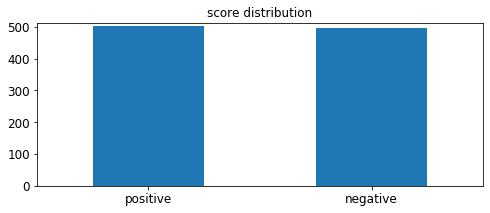

In [39]:
upper_bound = max(X_sample.connotation.value_counts()) + 10

print(X_sample.connotation.value_counts())

# plot barchart for X_sample
X_sample.connotation.value_counts().plot(kind = 'bar',
                                           title = 'score distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

======Exercise 8 (take home)

Text(0.5, 1.0, 'Category distribution')

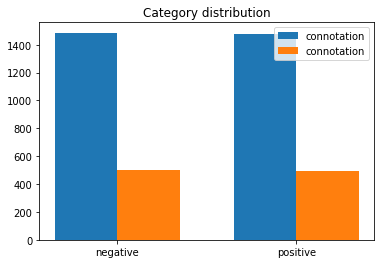

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(data.connotation.value_counts().index, data.connotation.value_counts(), 
        label = 'connotation', align = "edge", width = -0.35) #minus 0.35 from the edge
plt.bar(data.connotation.value_counts().index, X_sample.connotation.value_counts(), 
        label = 'connotation', align = "edge", width = 0.35)

plt.legend() #for using label
plt.title("Category distribution")

In [41]:
import nltk
# takes a like a minute or two to process
data['unigrams'] = data['sentences'].apply(lambda x: dmh.tokenize_text(x))
data[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [42]:
data[0:4]

sentences  score connotation  \
0  So there is no way for me to plug it in here i...      0    negative   
1                        Good case, Excellent value.      1    positive   
2                             Great for the jawbone.      1    positive   
3  Tied to charger for conversations lasting more...      0    negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [43]:
list(data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.sentences)

In [45]:
X_counts.shape

(2966, 5153)

In [46]:
" ".join(list(data[4:5].sentences))

'The mic is great.'

Exercise 9 (5 min)

In [47]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(data[:1].sentences)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [48]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [49]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

---

======Exercise 10 (take home)

In [50]:
# use for loop to find the 1st 1 location in third row
for i in range(99):
    if X_counts[3, 0:100].toarray()[0][i+1]==1:
        print("This 1 represent:",count_vect.get_feature_names()[i+1],"term")

This 1 represent: 45 term


In [51]:
count_vect.transform(['45 Something completely new.']).toarray()[0][40:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

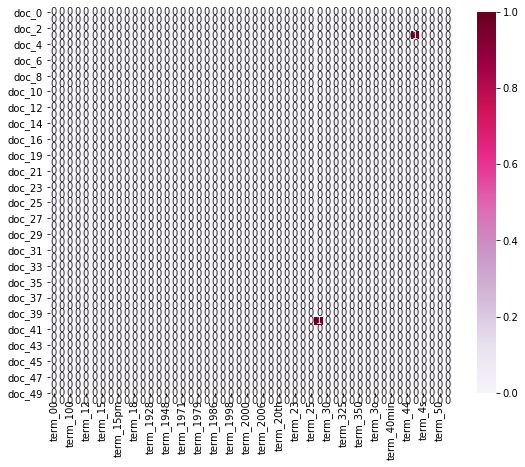

In [52]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:50]]
plot_z = X_counts[0:50, 0:50].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [53]:
X_counts[0:50, 0:50]

<50x50 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

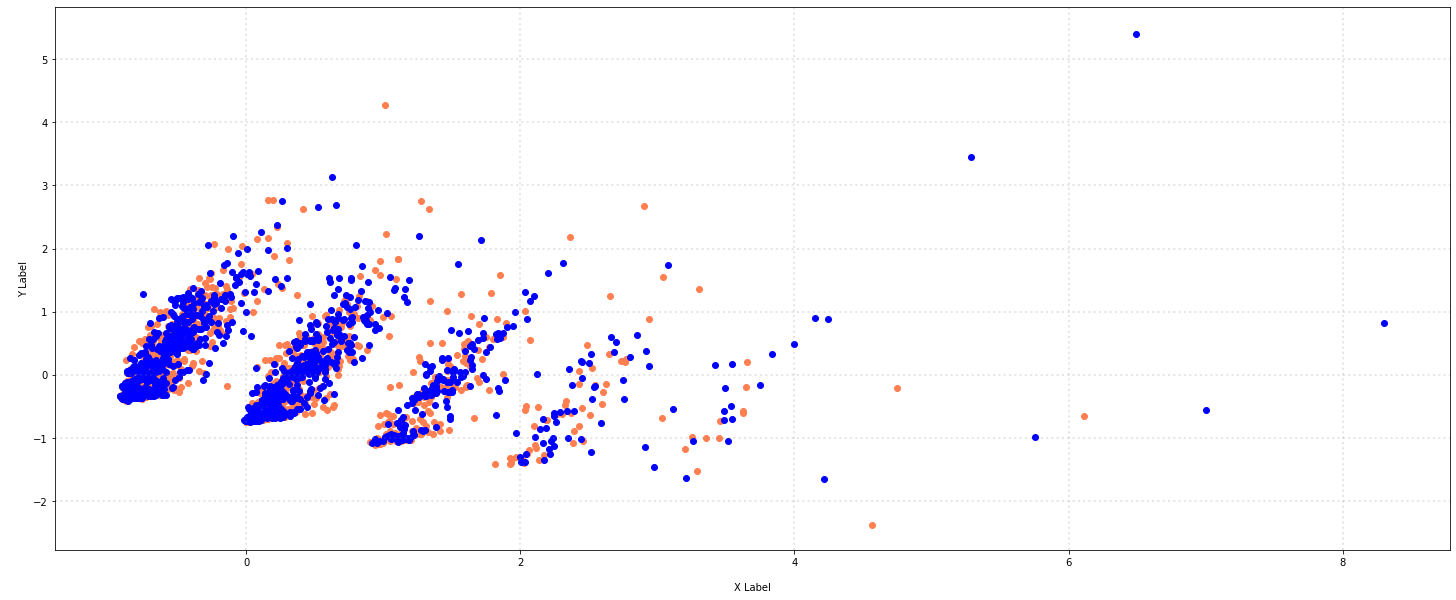

In [54]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())


col = ['coral', 'blue']

categories= ['negative','positive']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[data['connotation'] == category].T[0]
    ys = X_reduced[data['connotation'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

======Exercise 12 (take home)

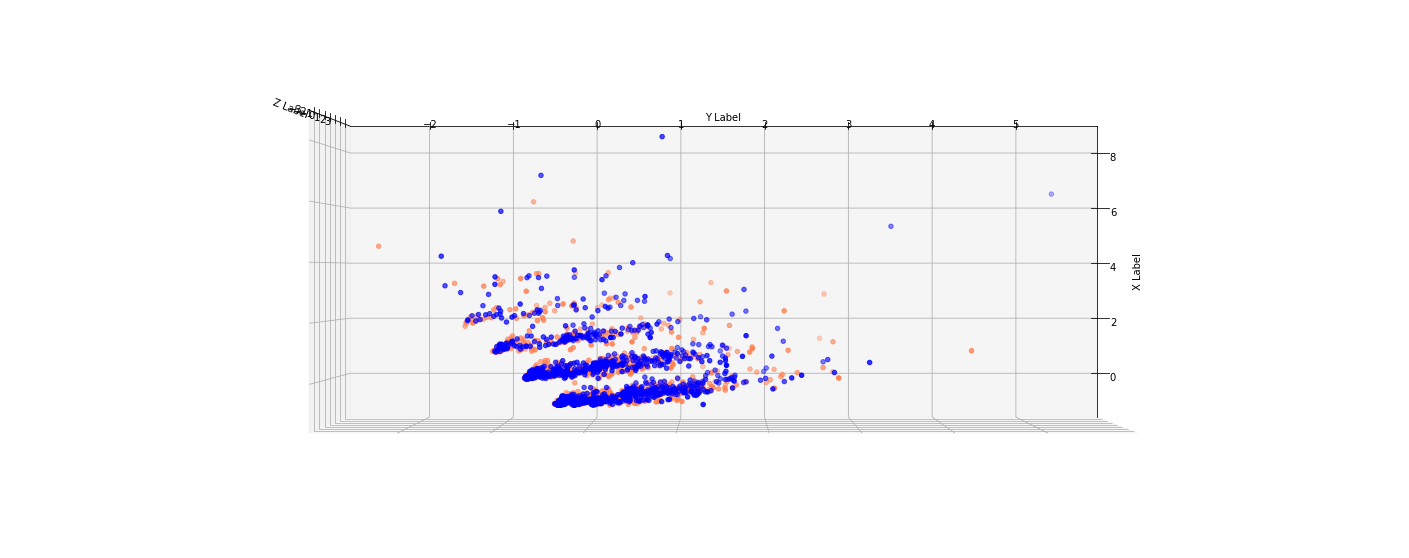

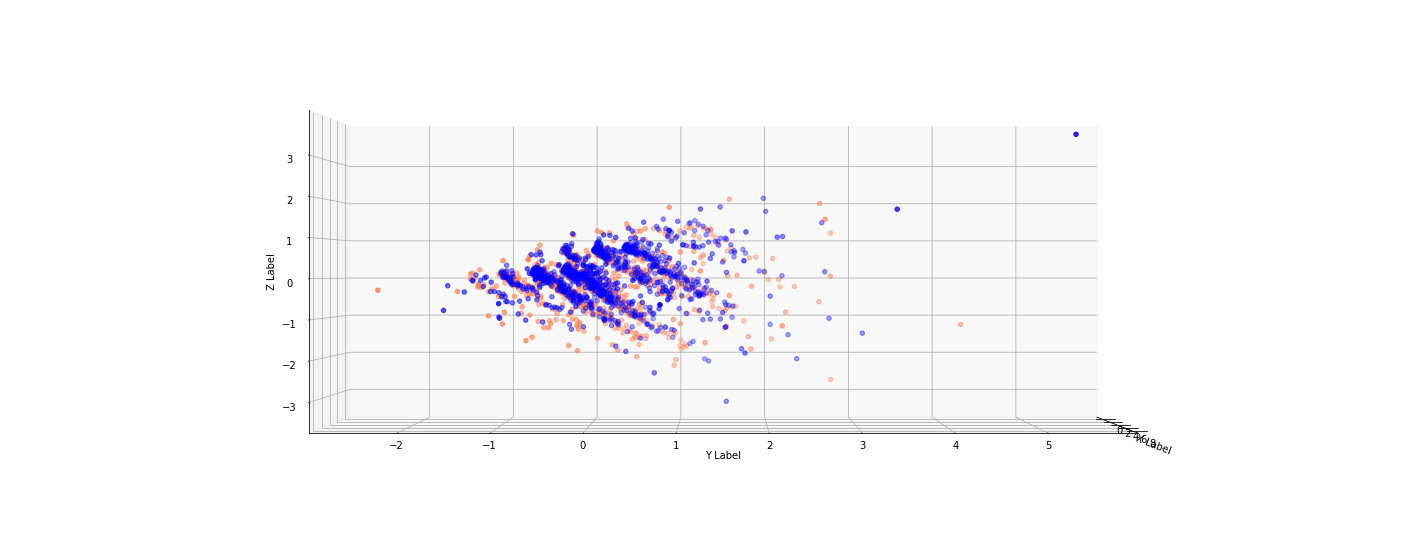

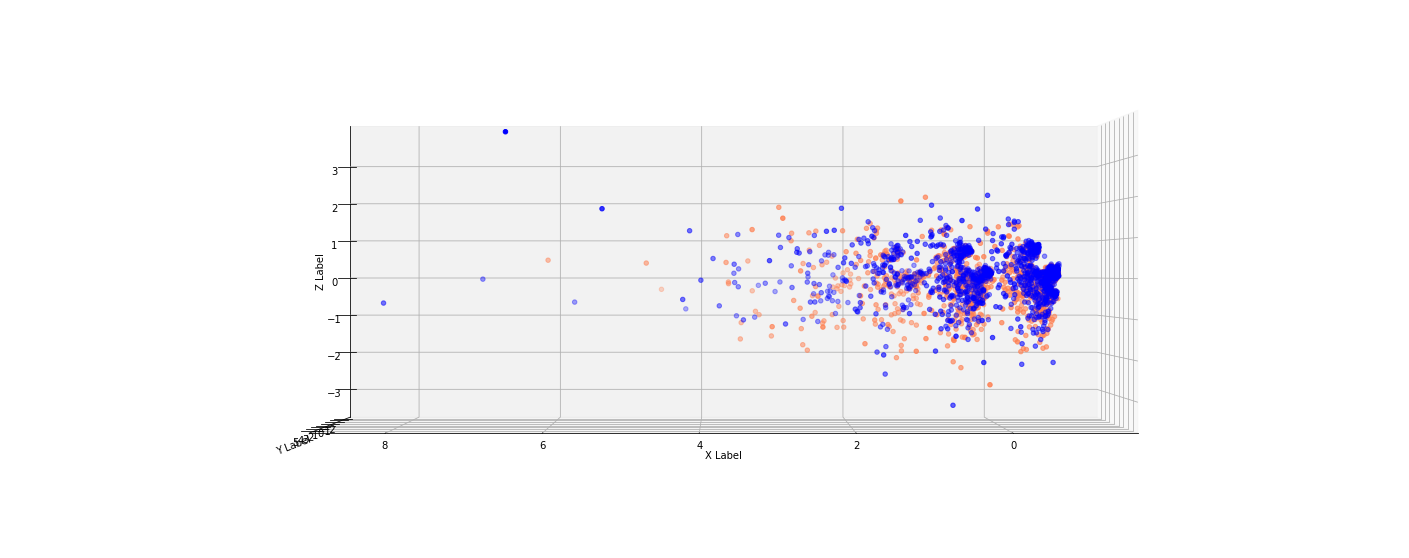

In [55]:
def plot3D(x,y): #def function for plt 3 times in one cell
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.decomposition import PCA
    X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) #reduce the dimension to 3

    col = ['coral', 'blue']

    categories= ['negative','positive']

    # plot
    fig = plt.figure(figsize = (25,10))
    #ax = fig.subplots()

    ax = fig.add_subplot(111, projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[data['connotation'] == category].T[0]
        ys = X_reduced[data['connotation'] == category].T[1]
        zs = X_reduced[data['connotation'] == category].T[2]

        #ax.scatter(xs, ys, zs, s= 40, c = c, marker='o')
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev=x, azim=y)

    plt.show()
    
plot3D(-90,0)
plot3D(0,0)
plot3D(0,90)

    When the dimension is 3, it is still not possible to separate the four categories, i think it is because this kind of method to generate the word vector, the vector is too sparse, or maybe in some higher n dimension PCA will work.

---

In [56]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [57]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

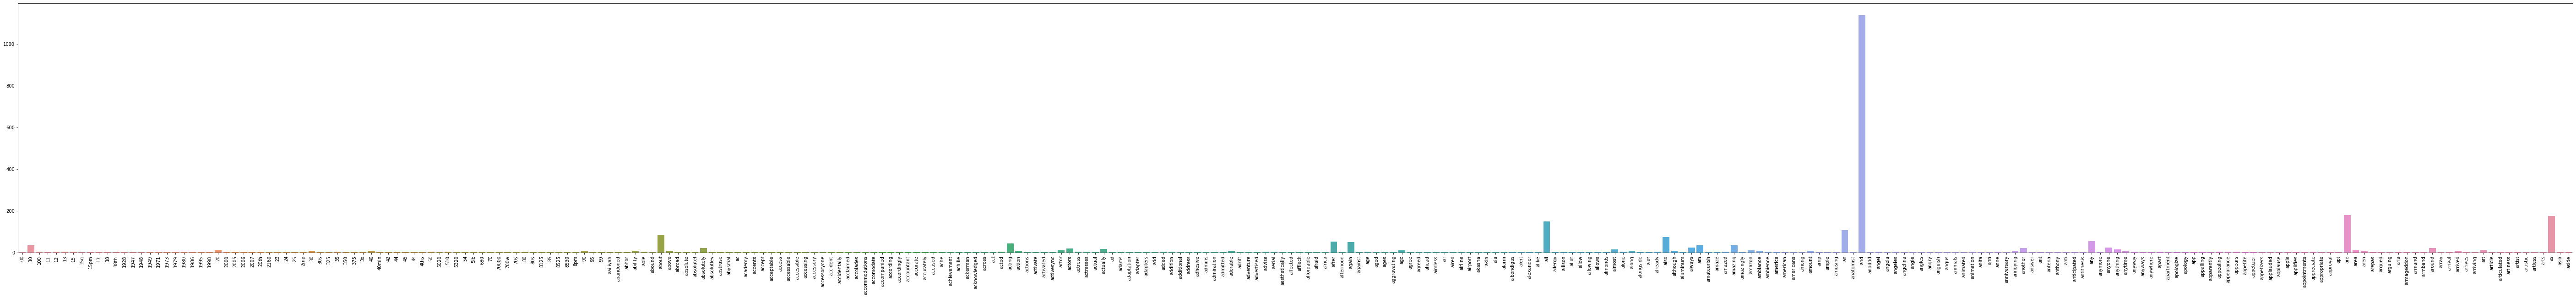

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

======Exercise 13 (take home)

In [59]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# using plotly and see how it perform the Bar figure
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100]))

fig.show()

======Exercise 14 (take home)

---

======Exercise 15 (take home)

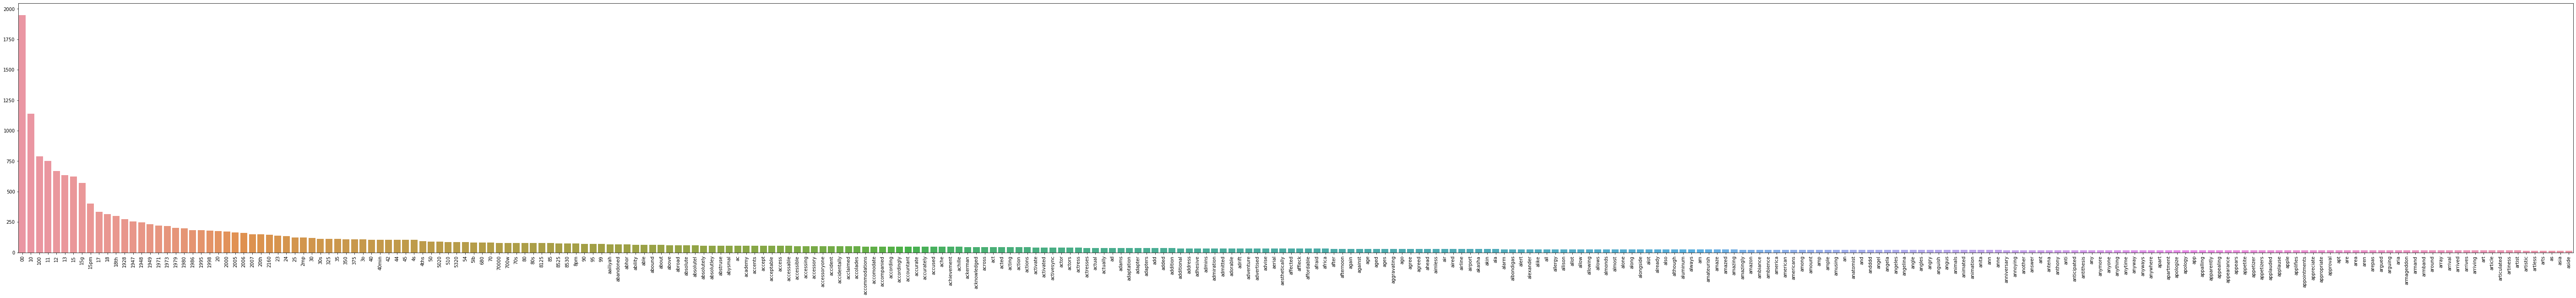

In [60]:
import seaborn as sns
ntf=sorted(term_frequencies, reverse=True)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], y=ntf[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

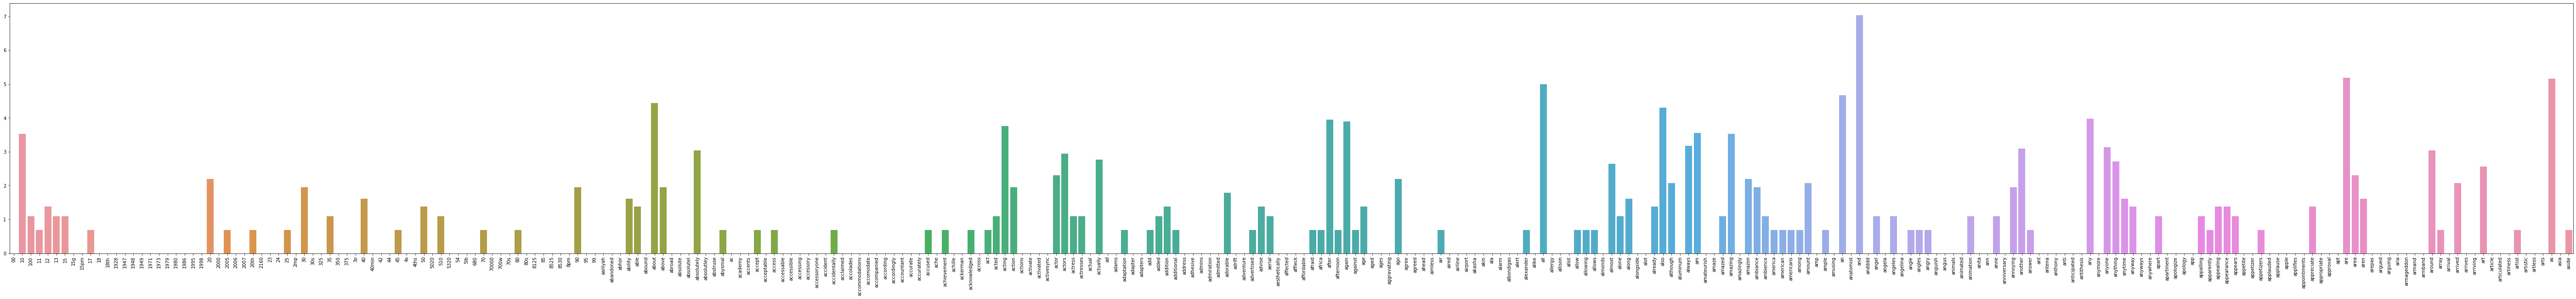

In [61]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [62]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)
mlb.classes_

array([0, 1], dtype=int64)

In [63]:
data['bin_score'] = mlb.transform(data['score']).tolist()

In [64]:
data[0:9]

sentences  score connotation  \
0  So there is no way for me to plug it in here i...      0    negative   
1                        Good case, Excellent value.      1    positive   
2                             Great for the jawbone.      1    positive   
3  Tied to charger for conversations lasting more...      0    negative   
4                                  The mic is great.      1    positive   
5  I have to jiggle the plug to get it to line up...      0    negative   
6  If you have several dozen or several hundred c...      0    negative   
7        If you are Razr owner...you must have this!      1    positive   
8                Needless to say, I wasted my money.      0    negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

---

======Exercise 16 (take home)

In [65]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.connotation)

data['bin_connotation'] = mlb.transform(data['connotation']).tolist()
data[0:9]

sentences  score connotation  \
0  So there is no way for me to plug it in here i...      0    negative   
1                        Good case, Excellent value.      1    positive   
2                             Great for the jawbone.      1    positive   
3  Tied to charger for conversations lasting more...      0    negative   
4                                  The mic is great.      1    positive   
5  I have to jiggle the plug to get it to line up...      0    negative   
6  If you have several dozen or several hundred c...      0    negative   
7        If you are Razr owner...you must have this!      1    positive   
8                Needless to say, I wasted my money.      0    negative   

                                            unigrams bin_score bin_connotation  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]             [0]  
1               [Good, case, ,, Excellent, value, .]       [1]             [1]  
2                      [Great, for, the, jawbone, .]       [1]             [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]             [0]  
4                           [The, mic, is, great, .]       [1]             [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]             [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]             [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]             [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]             [0]

    yes, it works

---

    6.Data Exploration

In [66]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

In [67]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [68]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---

    the vector is too sprase that Cosine Similarity is zero, i thick it is because the sentence is short and the sentence is too much, so this way to generate the vector, the vecter will getting too sprase,

---
---

<font size=6>Third: please attempt the following tasks on the new dataset

    new data visualizations

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data.sentences)
X1= list(X.toarray())

In [131]:
XX= X.toarray()[data["score"]==0]
XX1= X.toarray()[data["score"]==1]

In [132]:
term_frequencies = []
for j in range(0,XX.shape[1]):
    term_frequencies.append(sum(XX[:,j]))
    
term_frequencies1 = []
for j in range(0,XX1.shape[1]):
    term_frequencies1.append(sum(XX1[:,j]))

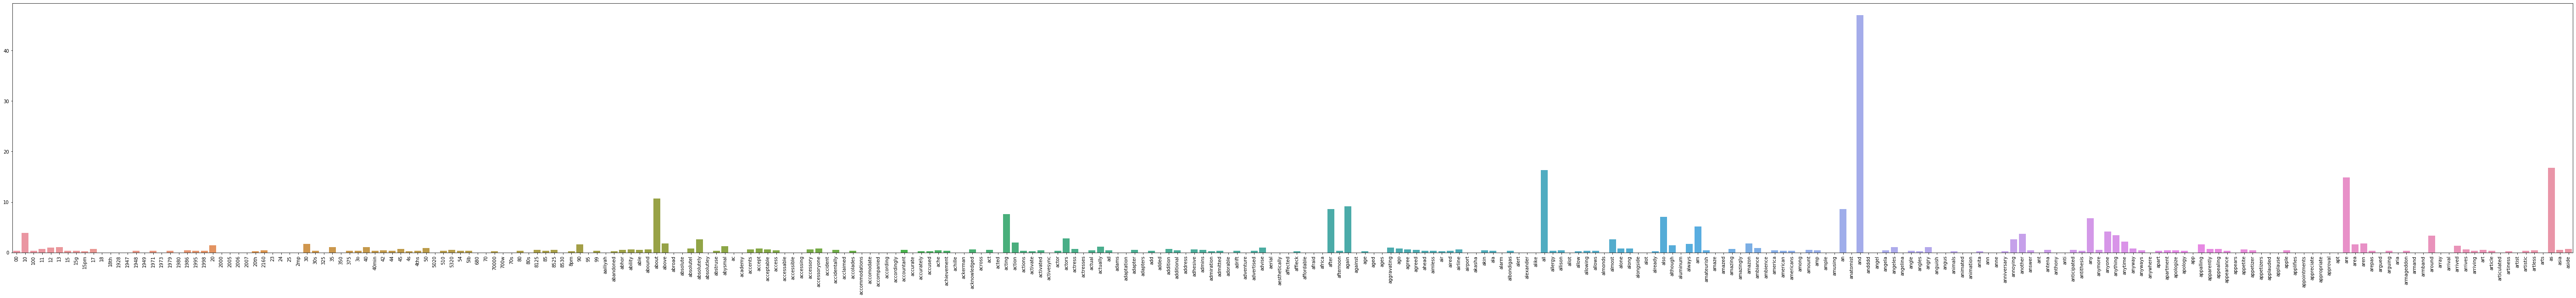

In [133]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vectorizer.get_feature_names()[:300],y=term_frequencies[:300])
g.set_xticklabels(vectorizer.get_feature_names()[:300], rotation = 90);

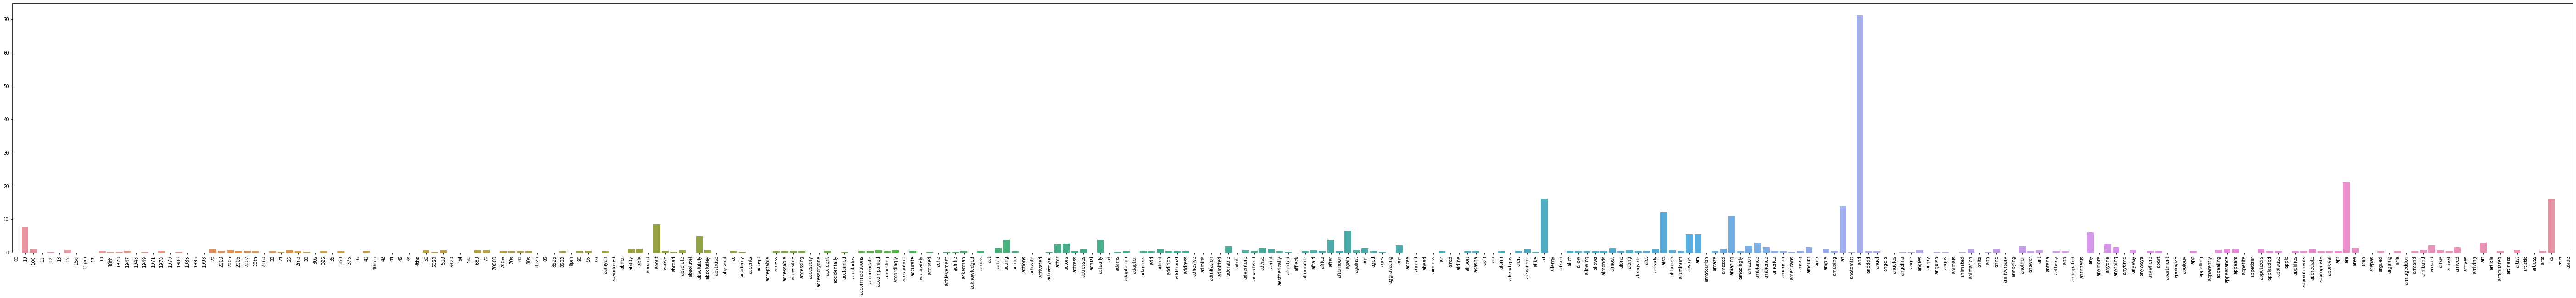

In [134]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vectorizer.get_feature_names()[:300],y=term_frequencies1[:300])
g.set_xticklabels(vectorizer.get_feature_names()[:300], rotation = 90);

    I generate tfidf feature and then aggregate them separately by different category, you can find out the "score"=0 and "score"=1 this two category are different in some feature, it mean you probably can classify them more efficiency by using those feature.

---

    TF-IDF features

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.sentences)

In [72]:
X.shape

(2966, 5153)

In [73]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---

    Naive Bayes classifier

In [74]:
# split the data for train and test

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x= data.sentences
y= data.score

data_x = x.values
data_y = y.values

validation_size = 0.5
seed = 3
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=validation_size, random_state=seed)

In [75]:
# making TF-IDF features

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(x_train)
X1= list(X.toarray())

xtest= vectorizer.transform(x_test)

model = GaussianNB()

model.fit(X1, y_train)

model.score(xtest.toarray(), y_test) #accuracy task

0.6520566419420094

In [76]:
# making word frequency features

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(x_train)
X2=list(X_counts.toarray())

xtest2= count_vect.transform(x_test)

model = GaussianNB()

model.fit(X2, y_train)

model.score(xtest2.toarray(), y_test) #accuracy task

0.6446392447741065

    It seem like TFIDF feature is a little bit better than word frequency feature, that mean TFIDF is more useful for classify.

---

---

<font size=6>Fourth: In the lab, What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

    In the data preprocessing part, the WORD VECTOR generated in this way cannot preserve the relationship between each data, and it will also makes the dimension too large, and then getting the worse performance.
    I think in the text classification task, we can do stemming, remove stop word, and then use the neuron network to generate more meaniful vector such like document emedding for the sentence, the document emedding can preserve the relationship between each sentence,  that will be a nice Data preprocessing.